# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
## Install it from cmd prompt: (base) C:\me\Programming>pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
## random.uniform: Draw samples from a uniform distribution.
## returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

## create (lat, lng) tuple lists
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
## fetch the first 60 cities and use it as a test set for coding
#test_cities = cities[0:70]
#print(len(test_cities))
#print(test_cities)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Weather Check Using API Calls

In [4]:
MAX_NUM_RECORD_PER_SET = 49

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
## Declare a list of variables to hold the Max Temperature, Humidity, Cloudiness, Wind Speed, and Country
lat_ar = []
lng_ar = []
max_temperature_ar = []
humidity_ar = []
cloudiness_ar = []
wind_speed_ar = []
date_ar = []
country_ar = []

set_no = 1
record_no = 0

## print the log file header
print("Beginning Data Retrieval")
print("-------------------------------")

## for loop: 
##for i in range(70):
for i in range(len(cities)):
    ## Avoid overloading the system with API requests
    time.sleep(1) 
    
    ##city_url = query_url + cities[i]
    city_url = query_url + cities[i]
    
    ## print(f"City_url = {city_url}")
    
    response_json = requests.get(city_url).json()

    ## Catch the situations with the attribute name, but value is empty
    try: 
        lat_ar.append(response_json['coord']['lat'])
        lng_ar.append(response_json['coord']['lon'])
        max_temperature_ar.append(response_json['main']['temp_max'])
        humidity_ar.append(response_json['main']['humidity'])
        cloudiness_ar.append(response_json['clouds']['all'])
        wind_speed_ar.append(response_json['wind']['speed'])
        date_ar.append(response_json['dt'])
        country_ar.append(response_json['sys']['country'])
        
        ## print the log file line for each city: 
        print(f"Processing Record {record_no} of Set {set_no} | {cities[i]}")
            
        ## check to see if city_no = 50, if so, increment set_no
        ## set the record_no and set_no for the next round of log printing
        if record_no == MAX_NUM_RECORD_PER_SET:
            record_no = 0
            set_no += 1
            ##print(f"record_no = {record_no}, set_no = {set_no}")
        else:
            record_no += 1
            ##print(f"Just add 1 to record_no: record_no = {record_no}")     
        
    except KeyError:
        ## don't have data -> put NaN
        lat_ar.append(np.nan)
        lng_ar.append(np.nan)
        max_temperature_ar.append(np.nan)
        humidity_ar.append(np.nan)
        cloudiness_ar.append(0)
        wind_speed_ar.append(np.nan)
        date_ar.append(np.nan)
        country_ar.append(np.nan)
        print(f"City | {cities[i]} not found. Skipping...")
        ##print(f"record_no = {record_no}, set_no = {set_no}")
    
## print the log file ending sentence
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
  

Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set 1 | olafsvik
Processing Record 1 of Set 1 | labytnangi
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | los llanos de aridane
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | havre-saint-pierre
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | maumere
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | fort nelson
Processing Record 12 of Set 1 | tasiilaq
City | belushya guba not found. Skipping...
Processing Record 13 of Set 1 | casay
City | attawapiskat not found. Skipping...
City | mys shmidta not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | manavalakurichi
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
## Creata a dataframe with all the data retrieved
##city_weather_df = pd.DataFrame("City": cities, 
city_weather_df = pd.DataFrame({"City": cities, 
                               "Lat": lat_ar, 
                               "Lng": lng_ar,
                               "Max Temp": max_temperature_ar, 
                               "Humidity": humidity_ar,
                               "Cloudiness": cloudiness_ar,
                               "Wind Speed": wind_speed_ar,
                               "Country": country_ar,
                               "Date": date_ar
                               })

## before drop_na, 
old_len = len(city_weather_df["City"])
print(f"city_weather_df = {str(old_len)}")
# print(f"city_weather_df size is {len(city_weather_df["City"])}")

## Clean up df by dropping rows with NaN
clean_city_weather_df = city_weather_df.dropna(how='any')

new_len = len(clean_city_weather_df["City"])
print(f"clean_city_weather_df size is {str(new_len)}")

## export the city data into a csv file
clean_city_weather_df.to_csv('../output_data/cities.csv',encoding = 'utf-8',index = False)

## display the DataFrame
city_weather_df.head()

city_weather_df = 620
clean_city_weather_df size is 565


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,olafsvik,99,IS,1.616997e+09,67.0,64.8945,-23.7142,29.50,14.23
1,labytnangi,75,RU,1.616997e+09,92.0,66.6572,66.4183,3.72,8.14
2,punta arenas,0,CL,1.616997e+09,75.0,-53.1500,-70.9167,42.80,3.44
3,los llanos de aridane,75,ES,1.616997e+09,72.0,28.6585,-17.9182,64.40,12.66
4,rikitea,3,PF,1.616997e+09,72.0,-23.1203,-134.9692,79.20,14.56


In [8]:
clean_city_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000
mean,54.205310,1.616997e+09,70.139823,22.086691,19.113912,57.143363,8.477150
std,38.895071,2.584712e+02,24.220323,32.386755,88.736610,24.932326,5.974642
min,0.000000,1.616996e+09,1.000000,-54.800000,-179.166700,-23.800000,0.020000
25%,11.000000,1.616997e+09,61.000000,-3.333300,-56.154900,39.900000,3.940000
50%,66.000000,1.616997e+09,76.000000,27.133300,20.647300,61.000000,6.930000
75%,90.000000,1.616997e+09,88.000000,49.600000,94.733300,76.530000,11.500000
max,100.000000,1.616998e+09,100.000000,78.218600,179.316700,102.200000,32.970000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

## get the index list from the df
idx = clean_city_weather_df.index

## Get the indices that satisfy the humidity condition
humidity_exceed_max_indices = idx[clean_city_weather_df["Humidity"] > 100]

print(f"Number of cities with humidity > 100: {str(len(humidity_exceed_max_indices.tolist()))}")

## print the indices
humidity_exceed_max_indices


Number of cities with humidity > 100: 0


Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Skip this step because no city in clean_city_weather_df has humidity > 100. 

## print the clean_city_weather_df
clean_city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,olafsvik,99,IS,1.616997e+09,67.0,64.8945,-23.7142,29.50,14.23
1,labytnangi,75,RU,1.616997e+09,92.0,66.6572,66.4183,3.72,8.14
2,punta arenas,0,CL,1.616997e+09,75.0,-53.1500,-70.9167,42.80,3.44
3,los llanos de aridane,75,ES,1.616997e+09,72.0,28.6585,-17.9182,64.40,12.66
4,rikitea,3,PF,1.616997e+09,72.0,-23.1203,-134.9692,79.20,14.56


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

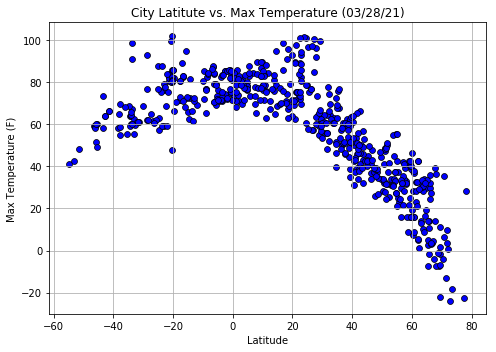

In [12]:
plt.figure(figsize=(7,5))

## Plot the lat vs the Max Temp
plt.scatter(x = clean_city_weather_df['Lat'], y = clean_city_weather_df['Max Temp'], linewidths = 0.75, color = 'blue', edgecolor = 'black', s = 35)
plt.grid()

## Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitute vs. Max Temperature (03/28/21)")

## Save the plot
plt.savefig("../output_data/CityLat_vs_MaxTemp.png")

## Show plot
plt.tight_layout()
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


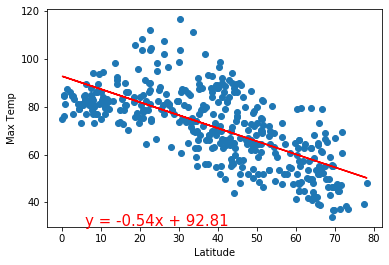

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


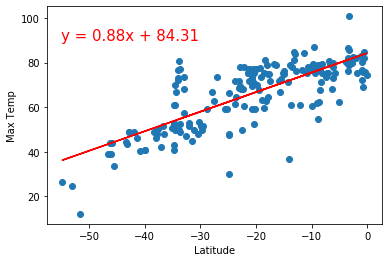

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


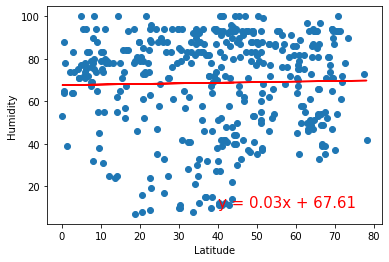

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


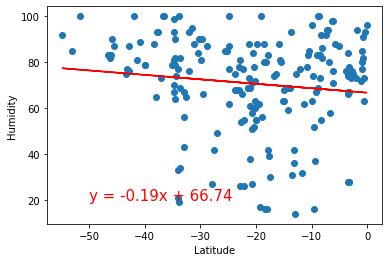

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


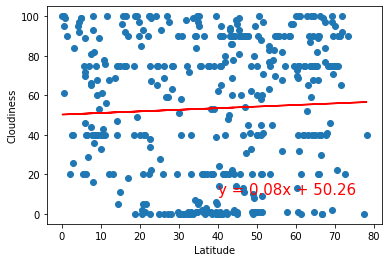

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


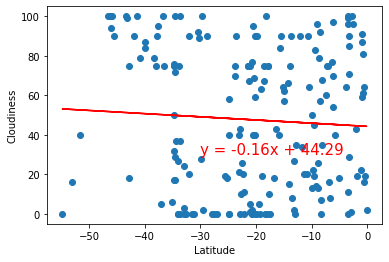

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


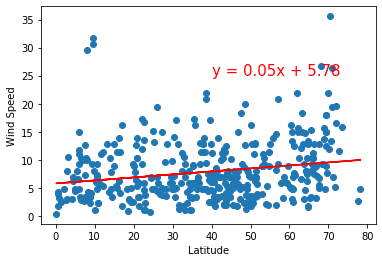

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


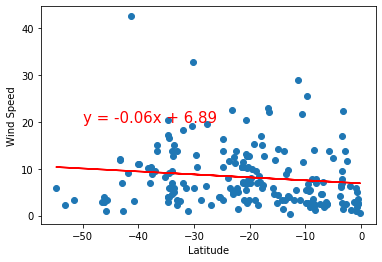